# **Import Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV

In [4]:
covid_data = pd.read_csv(r"C:\Users\user\Desktop\data Science weekly Lectures\full_grouped.csv")

In [5]:
covid_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


# **Data Cleaning**

In [7]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [192]:
covid_data.describe()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio,Daily Growth Rates
count,35156.000000,3.515600e+04,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000
mean,93.000000,5.493056e-03,0.008338,0.005983,0.004007,0.006076,0.004786,0.001923,1.962567,-0.304412,34.305768
std,53.982246,3.495869e-02,0.050248,0.034953,0.031945,0.038908,0.029768,0.014767,1.579872,1.759285,641.560666
min,0.000000,0.000000e+00,0.000000,0.000000,-0.000001,0.000000,-0.493440,-0.116373,0.000000,-114.485833,-1.000000
25%,46.000000,2.330862e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900898
50%,93.000000,5.827154e-05,0.000027,0.000018,0.000030,0.000026,0.000000,0.000000,2.000000,0.000000,0.000000
75%,140.000000,8.484919e-04,0.000529,0.000697,0.000516,0.000971,0.000257,0.000143,3.000000,0.000000,0.000000
max,186.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,43.201554,49309.000000


In [8]:
covid_data.duplicated().sum()

0

In [9]:
covid_data.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [10]:
from datetime import datetime

In [11]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [12]:
covid_data['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
35151   2020-07-27
35152   2020-07-27
35153   2020-07-27
35154   2020-07-27
35155   2020-07-27
Name: Date, Length: 35156, dtype: datetime64[ns]

In [13]:
covid_data['WHO Region'].value_counts()

WHO Region
Europe                   10528
Africa                    9024
Americas                  6580
Eastern Mediterranean     4136
Western Pacific           3008
South-East Asia           1880
Name: count, dtype: int64

# **Data Normalization**

In [15]:
covid_data['Country/Region'] = covid_data['Country/Region'].apply(lambda x: x.strip()) 

In [16]:
covid_data['WHO Region'] = covid_data['WHO Region'].apply(lambda x: x.strip()) 

In [17]:
covid_data['Confirmed'] = covid_data['Confirmed']/covid_data['Confirmed'].max()

In [18]:
covid_data['Deaths'] = covid_data['Deaths']/covid_data['Deaths'].max()

In [19]:
covid_data['Recovered'] = covid_data['Recovered']/covid_data['Recovered'].max()

In [20]:
covid_data['Active'] = covid_data['Active']/covid_data['Active'].max()

In [21]:
covid_data['New cases'] = covid_data['New cases']/covid_data['New cases'].max()

In [22]:
covid_data['New deaths'] = covid_data['New deaths']/covid_data['New deaths'].max() 

In [23]:
covid_data['New recovered'] = covid_data['New recovered']/covid_data['New recovered'].max()

In [24]:
covid_data['Active'] = covid_data['Active'].round(6) 

In [25]:
covid_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Eastern Mediterranean
1,2020-01-22,Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Europe
2,2020-01-22,Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Africa
3,2020-01-22,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Europe
4,2020-01-22,Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,Eastern Mediterranean
35152,2020-07-27,Western Sahara,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,Africa
35153,2020-07-27,Yemen,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,Eastern Mediterranean
35154,2020-07-27,Zambia,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,Africa


Text(0, 0.5, 'Count')

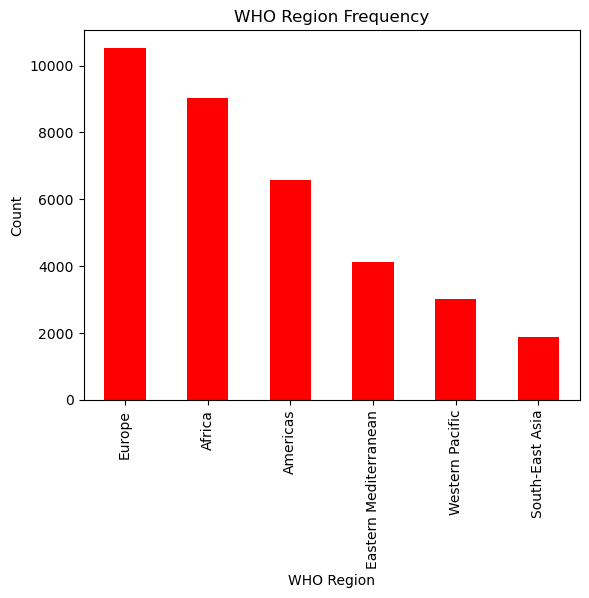

In [26]:
covid_data['WHO Region'].value_counts().plot(kind='bar', color = 'red', title = 'WHO Region Frequency').set_ylabel('Count')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
covid_data['Country/Region'] = le.fit_transform(covid_data['Country/Region'])

In [30]:
covid_data['WHO Region'] = le.fit_transform(covid_data['WHO Region'])

In [31]:
covid_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,2020-01-22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
2,2020-01-22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,2020-01-22,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,2020-01-22,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,182,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,2
35152,2020-07-27,183,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,0
35153,2020-07-27,184,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,2
35154,2020-07-27,185,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,0


# **Feature Engineering**

In [33]:
covid_data['Motality Ratio'] = covid_data['New cases']-covid_data['New recovered']/covid_data['New deaths']

In [34]:
covid_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio
0,2020-01-22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,NaN
1,2020-01-22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,NaN
2,2020-01-22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,NaN
3,2020-01-22,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,NaN
4,2020-01-22,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,182,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,2,0.001968
35152,2020-07-27,183,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,0,NaN
35153,2020-07-27,184,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,2,-0.249660
35154,2020-07-27,185,0.001061,0.000946,0.001524,0.000567,0.000919,0.000257,0.003320,0,-12.904865


In [35]:
covid_data['Motality Ratio'] = covid_data['Motality Ratio'].fillna(0) 

In [36]:
import numpy as np
covid_data['Motality Ratio'] = covid_data['Motality Ratio'].replace([np.inf, -np.inf],0)

In [37]:
covid_data['Daily Growth Rates'] = covid_data['New cases'].pct_change()

In [38]:
covid_data['Daily Growth Rates'] = covid_data['Daily Growth Rates'].fillna(0) 
covid_data['Daily Growth Rates'] = covid_data['Daily Growth Rates'].replace([np.inf, -np.inf],0)

# **Exploratory Data Analysis**

# Note: Europe = 3, Africa = 0, America = 1, Eastern Meditterranean = 2, Western Pacific = 5, Sount-east Asia = 4 

Text(0, 0.5, 'Count')

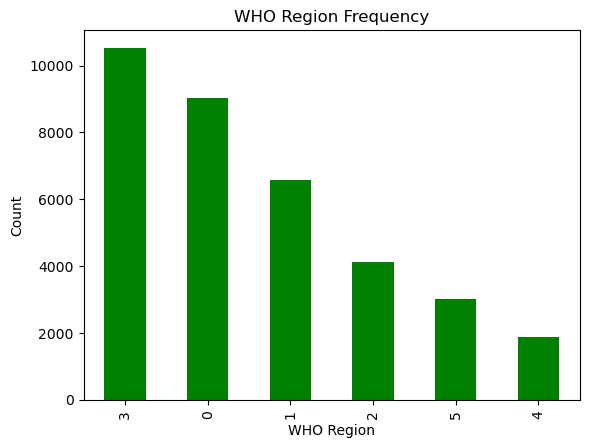

In [41]:
covid_data['WHO Region'].value_counts().plot(kind='bar', color = 'green', title = 'WHO Region Frequency').set_ylabel('Count')

# Scatter plot to uncover trends in the data set

In [43]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                35156 non-null  datetime64[ns]
 1   Country/Region      35156 non-null  int32         
 2   Confirmed           35156 non-null  float64       
 3   Deaths              35156 non-null  float64       
 4   Recovered           35156 non-null  float64       
 5   Active              35156 non-null  float64       
 6   New cases           35156 non-null  float64       
 7   New deaths          35156 non-null  float64       
 8   New recovered       35156 non-null  float64       
 9   WHO Region          35156 non-null  int32         
 10  Motality Ratio      35156 non-null  float64       
 11  Daily Growth Rates  35156 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 3.0 MB


In [44]:
covid_data['Motality Ratio'].value_counts()

Motality Ratio
 0.000000    24261
 0.000013       45
 0.000052       40
 0.000026       38
 0.000039       35
             ...  
-2.793860        1
-0.635531        1
-0.406616        1
-0.308807        1
-0.330567        1
Name: count, Length: 9211, dtype: int64

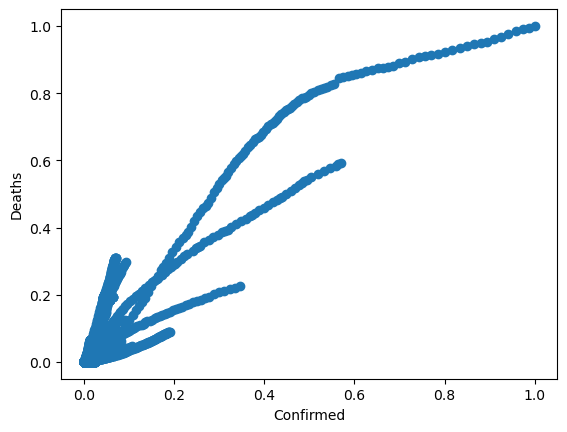

In [45]:
plt.scatter(covid_data['Confirmed'], covid_data['Deaths'])
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

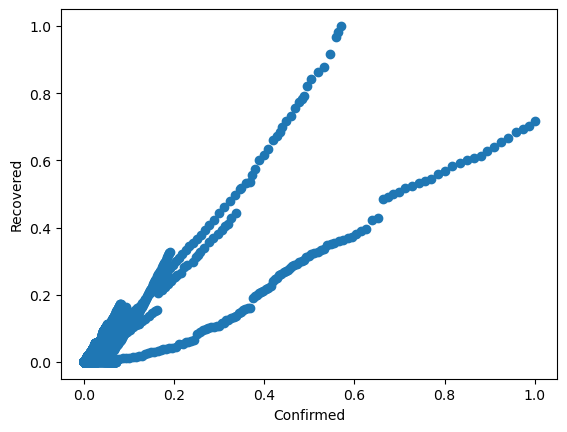

In [46]:
plt.scatter(covid_data['Confirmed'], covid_data['Recovered'])
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()

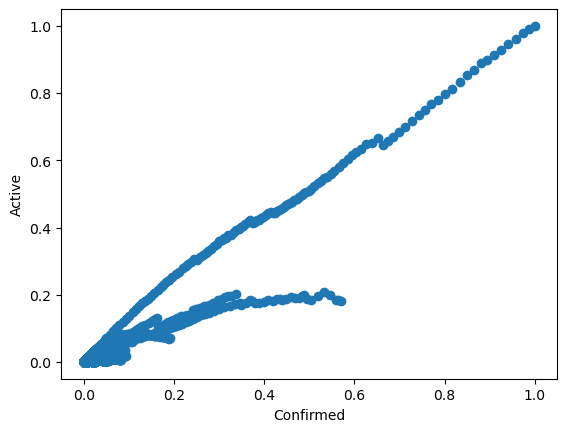

In [47]:
plt.scatter(covid_data['Confirmed'], covid_data['Active'])
plt.xlabel('Confirmed')
plt.ylabel('Active')
plt.show()

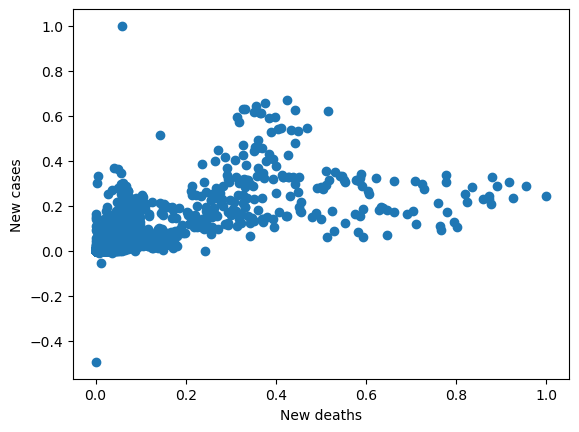

In [48]:
plt.scatter(covid_data['New cases'], covid_data['New deaths'])
plt.xlabel('New deaths')
plt.ylabel('New cases')
plt.show()

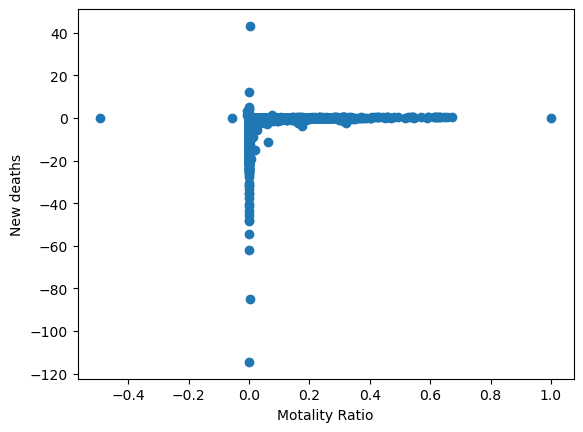

In [49]:
plt.scatter(covid_data['New deaths'], covid_data['Motality Ratio'])
plt.xlabel('Motality Ratio')
plt.ylabel('New deaths')
plt.show()

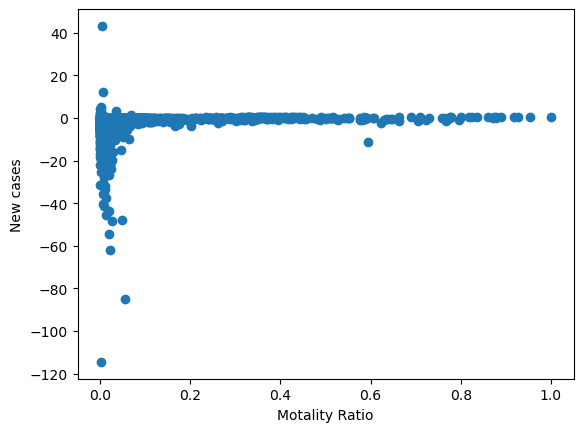

In [50]:
plt.scatter(covid_data['New cases'], covid_data['Motality Ratio'])
plt.xlabel('Motality Ratio')
plt.ylabel('New cases')
plt.show()

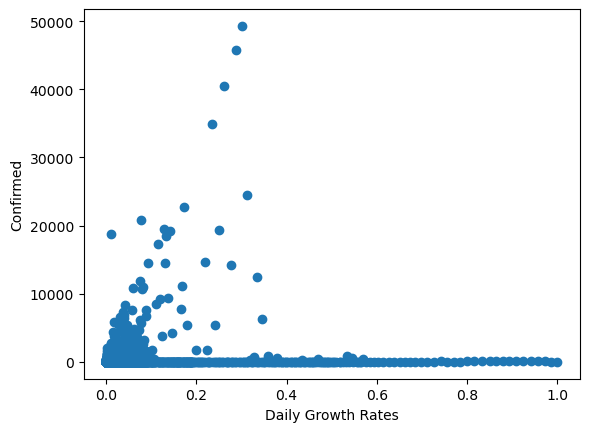

In [51]:
plt.scatter(covid_data['Confirmed'], covid_data['Daily Growth Rates'])
plt.xlabel('Daily Growth Rates')
plt.ylabel('Confirmed')
plt.show()

# **Correlation**

In [103]:
covid_data.corr()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio,Daily Growth Rates
Date,1.000000e+00,-5.720593e-15,0.158197,0.151766,0.192145,0.113321,0.127137,0.083455,0.128326,-2.028911e-15,-0.155181,0.052310
Country/Region,-5.720593e-15,1.000000e+00,0.055704,0.065930,0.017751,0.074673,0.038726,0.043063,0.002028,5.963186e-02,-0.018568,-0.007552
Confirmed,1.581969e-01,5.570360e-02,1.000000,0.912016,0.894418,0.949940,0.893966,0.602815,0.675623,2.810138e-03,-0.041328,0.156462
Deaths,1.517663e-01,6.593034e-02,0.912016,1.000000,0.761093,0.891647,0.767812,0.630283,0.551870,1.541973e-02,-0.004300,0.093579
Recovered,1.921448e-01,1.775057e-02,0.894418,0.761093,1.000000,0.710665,0.808816,0.515154,0.761926,2.090165e-02,-0.076407,0.221113
Active,1.133213e-01,7.467318e-02,0.949940,0.891647,0.710665,1.000000,0.846513,0.583213,0.534027,-1.158514e-02,-0.013723,0.094458
New cases,1.271372e-01,3.872607e-02,0.893966,0.767812,0.808816,0.846513,1.000000,0.733583,0.725761,-1.083394e-02,-0.030074,0.278089
New deaths,8.345471e-02,4.306286e-02,0.602815,0.630283,0.515154,0.583213,0.733583,1.000000,0.503319,-3.759195e-03,0.008994,0.175510
New recovered,1.283259e-01,2.028465e-03,0.675623,0.551870,0.761926,0.534027,0.725761,0.503319,1.000000,-5.891610e-04,-0.117852,0.273743
WHO Region,-2.028911e-15,5.963186e-02,0.002810,0.015420,0.020902,-0.011585,-0.010834,-0.003759,-0.000589,1.000000e+00,-0.033849,0.025959


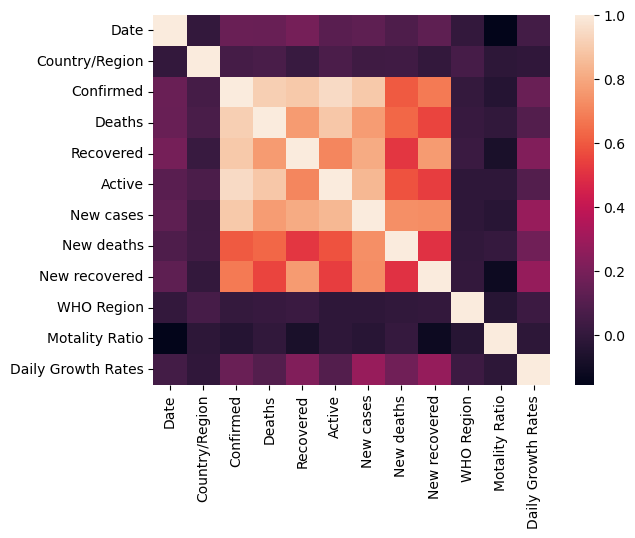

In [101]:
sns.heatmap(covid_data.corr())

plt.show()

# **Importing Necessary Libraries for the Model training**

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Preparing Data for Training

In [146]:
covid_data.set_index('Date', inplace = True)

In [148]:
covid_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Motality Ratio,Daily Growth Rates
Date,,,,,,,,,,,
2020-01-22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000
2020-01-22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000
2020-01-22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2020-01-22,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000
2020-01-22,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,182,0.002476,0.000527,0.002032,0.002411,0.001968,0.000515,0.000000,2,0.001968,12.818182
2020-07-27,183,0.000002,0.000007,0.000004,0.000000,0.000000,0.000000,0.000000,0,0.000000,-1.000000
2020-07-27,184,0.000394,0.003263,0.000451,0.000133,0.000129,0.001029,0.000257,2,-0.249660,0.000000


In [169]:
Data_covid = covid_data.drop(columns = ['Country/Region', 'WHO Region', 'Motality Ratio', 'Daily Growth Rates'],axis=1)

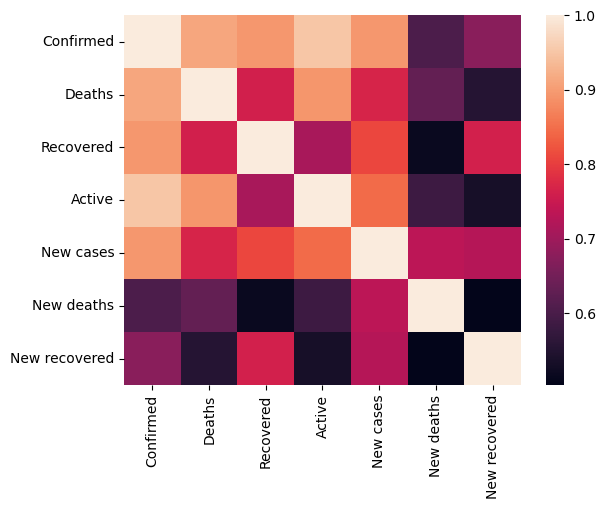

In [171]:
sns.heatmap(Data_covid.corr())

plt.show()

# Splitting Data to train data and Test data

In [173]:
train_size = int(0.8 * len(Data_covid))
train_data, test_data = Data_covid[0:train_size], Data_covid[train_size:len(Data_covid)]

In [175]:
print(train_data.shape, test_data.shape)

(28124, 7) (7032, 7)


# **Model Training** : Create and Fit the ARIMA model

In [177]:
model= ARIMA(train_data['New cases'], order=(5,1,0))
model_fit = model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Generating Predictions

In [180]:
predictions = model_fit.predict(start=len(train_data), end=len(Data_covid)-1, typ='levels')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# **Evaluate the Model**

In [185]:
mse = mean_squared_error(test_data['New cases'], predictions)
print('MSE: ', mse)

MSE:  0.005314442065479975


# Mean Squared Error(MSE) close to 0 indicate a perfect working model

# **Checking the Root Mean Squared Error (RMSE)**

# To provide a more interpretable error metric

In [189]:
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  0.07290021992751444


*Value of RMSE < 0.1(or 10% of the mean of the actual values) - Indicates that the model is highly accurate and reliable.